# DATA ANALYSIS - BOSTON HOUSING PRICES

## Task 1. Loading the data

The first step before proceeding is to load the data, which is stored in the file `housing.csv`.

To do this, we are going to use the **Pandas** library.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv",sep='\s+',names=["crim", "zn", "indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"])


In [2]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Task 2. Exploratory analysis





In [3]:
# DATA DIMENSIONS

print("Dimensions of the data:",data.shape)
print(data.shape[0], "instances.")
print(data.shape[1], "attributes.")


Dimensions of the data: (506, 14)
506 instances.
14 attributes.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Impressions**: it can be seen that there are no missing null gaps in the attribute values as there are 506 instances and each of the attributes contains 506 values, all columns are numeric (including the class, being a regression problem).

In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f164f12e290>]],
      dtype=object)

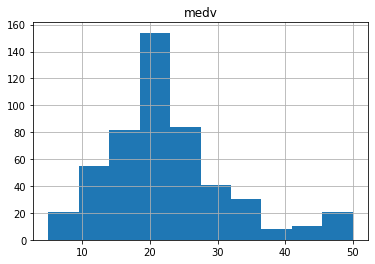

In [6]:
data.hist(column="medv",bins=10)

**Impressions**: roughly following a normal distribution with a slight tail to the right, the median value of the most common inhabited dwellings is around $20,000.

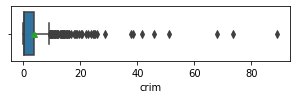

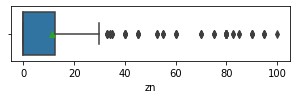

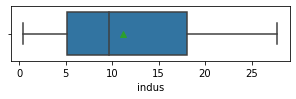

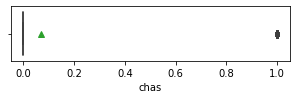

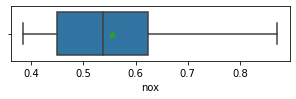

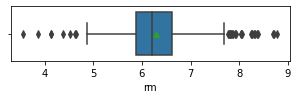

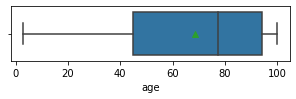

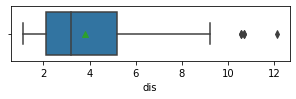

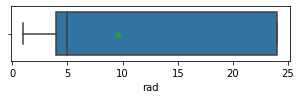

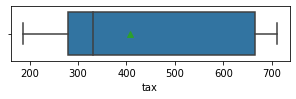

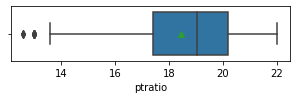

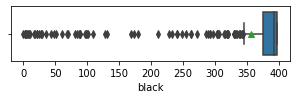

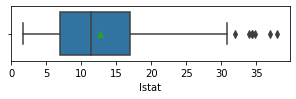

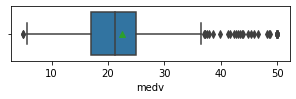

In [7]:
for col in data.columns:
    fig,ax = plt.subplots(1,1,figsize=(5,1))    
    sns.boxplot(x=data[col],showmeans=True)
    plt.show()

**Impressions**: it seems that there are variables that have outliers, such as *crim*, *zn*, *dis*, *ptratio*, *lstat*, *rm*, *black* and the class to predict *medv* itself. It might be a good idea to remove outliers and then predict on the filtered data.

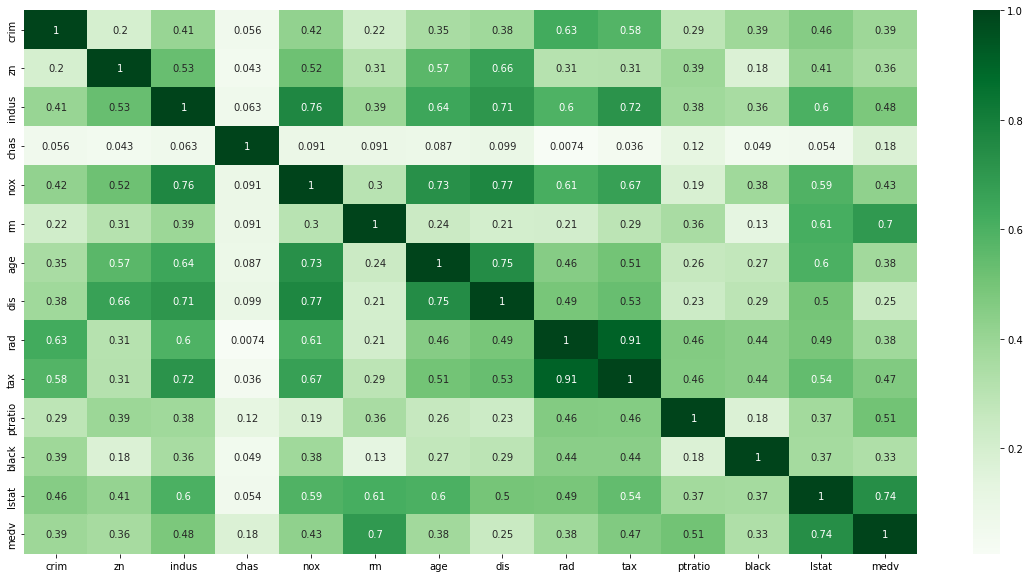

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), cmap='Greens', annot=True)

**Impressions**: Through this correlation matrix we observe several things:

* There is a strong correlation between *rad* and *tax* variables.
* The variables that correlate best with *medv* are *rm* and *lstat* (correlation coefficient >= 0.7).
* The variables that correlate worst with *medv* are *chas*, *dis*, *black*, *crim*, *zn*, *age*, *rad*. It may be interesting to try removing some of these variables later in the proposed model improvement to see how they actually influence the model (correlation does not imply causation).





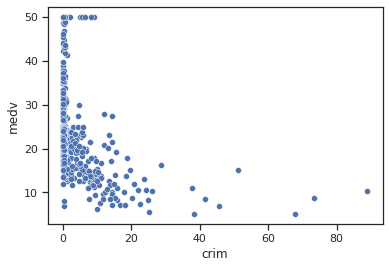

In [9]:
sns.set_theme(style="ticks")

sns.scatterplot(data=data,x="crim",y="medv")

**Impressions**: It appears that when the per capita crime rate is lower the median house value includes all types of values, high and low, while when the rate is increasing the median house value starts to decrease. 

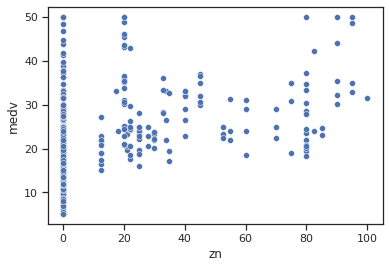

In [10]:
sns.scatterplot(data=data,x="zn",y="medv")

**Impressions**: some possible relationship between *zn* and *medv* is observed when the proportion of residential area in areas larger than 25,000 sq. ft. is non-zero, with slightly higher average housing values observed when the proportion is higher.

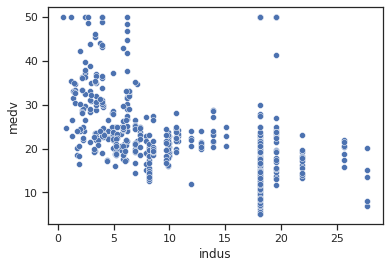

In [11]:
sns.scatterplot(data=data,x="indus",y="medv")

**Impressions**: The relationship between *indus* and *medv* is not very clear, but a slightly decreasing trend is observed where a line could be drawn. It seems that when there is a higher proportion of business extension (excl. retail trade) in the city the median value of inhabited dwellings is lower, while if the proportion is low the median value is rather higher.

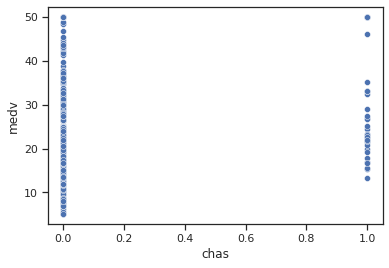

In [12]:
sns.scatterplot(data=data,x="chas",y="medv")

**Impressions**: it can be seen that it appears that when the Charles River is present the median value of inhabited dwellings is slightly higher.

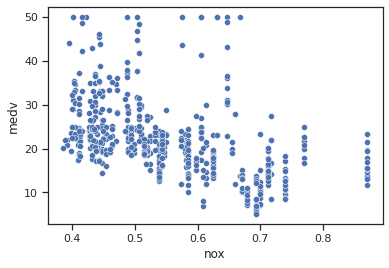

In [13]:
sns.scatterplot(data=data,x="nox",y="medv")

**Impressions**: It appears that when the concentration of nitrogen oxides is higher the median dwelling value is lower, while lower concentration values have higher median dwelling values.

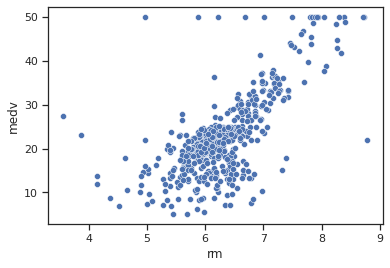

In [14]:
sns.scatterplot(data=data,x="rm",y="medv")

**Impressions**: There is a strong relationship between the average number of rooms per dwelling and the average value of the dwelling, which is almost a linear relationship (correlation coefficient of 0.7). It seems that the higher the average number of rooms, the higher the average value of the dwelling.

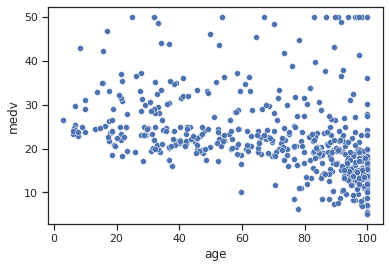

In [15]:
sns.scatterplot(data=data,x="age",y="medv")

**Impressions**: where the proportion of pre-1940 occupied dwellings is high, there appear to be more lower average house values, although high values are also included, and as the proportion decreases, the average house value increases.

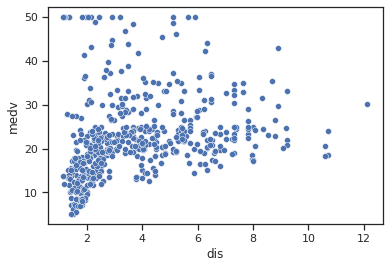

In [16]:
sns.scatterplot(data=data,x="dis",y="medv")

**Impressions**: When the weighted distance to five employment centres in Boston is low it appears that the median house value is lower overall (although a smaller number of high values are also included) and that as the distance increases the median house value increases.

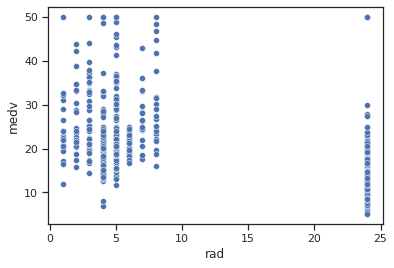

In [17]:
sns.scatterplot(data=data,x="rad",y="medv")

**Impressions**: it appears that when the radial motorway accessibility index is low there are higher average housing values than when the index is high.

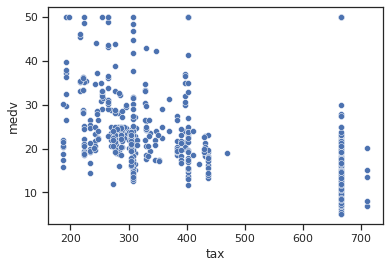

In [18]:
sns.scatterplot(data=data,x="tax",y="medv")

**Impressions**: it appears that when the property value tax per $10,000 is lower there are higher median housing values, whereas if the tax is high, lower housing values are found.

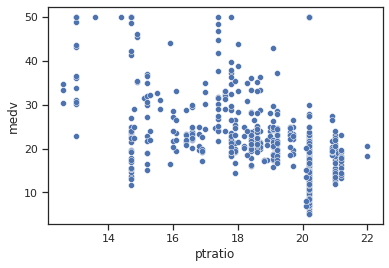

In [19]:
sns.scatterplot(data=data,x="ptratio",y="medv")

**Impressions**: it seems that when the pupil-teacher ratio in the city is higher there are lower average housing values, while if the ratio is low, higher average housing values are found.


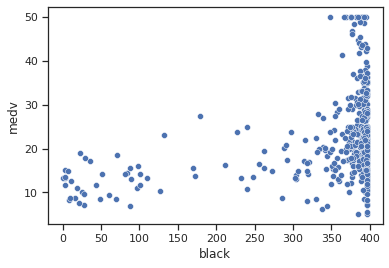

In [20]:
sns.scatterplot(data=data,x="black",y="medv")

**Impressions**: no linear relationship is observed, it seems that higher values are found with higher average housing values.

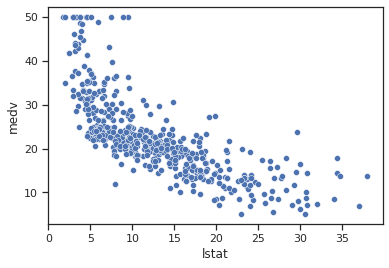

In [21]:
sns.scatterplot(data=data,x="lstat",y="medv")

**Impressions**: There is a good linear relationship between the percentage of the population that is lower class and the median house value. It seems that the higher the percentage of the population that is lower class, the lower the median house value.

## Task 3. Linear regression model



In [22]:
from sklearn.linear_model import LinearRegression
from math import sqrt

X=data[["crim", "zn", "indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y=data["medv"]

reg = LinearRegression().fit(X, y)
y_pred=reg.predict(X)

In [23]:
print(reg.coef_)
print(reg.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.4594883850902


In [24]:
# R2
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7406426641094095

In [25]:
# RMSE

from sklearn.metrics import mean_squared_error

sqrt(mean_squared_error(y, y_pred))

4.679191295697281

**Analysis**: An acceptable prediction is obtained on the training data, with an R2 coefficient not very close to the optimal value 1 , but also not offering random results.

The root mean square error is slightly high, in line with the R2 coefficient.

## Task 4. Improving the linear regression model

### Regularization methods

In [26]:
# L1 Lasso

from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=1.0)

reg_lasso.fit(X,y)

y_pred_lasso=reg_lasso.predict(X)

reg_lasso.score(X,y)

print("R2:",r2_score(y,y_pred_lasso))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_lasso)))


R2: 0.6825842212709925
RMSE: 5.176494871751199


In [27]:
# L2 Ridge
reg_ridge=linear_model.Ridge(alpha=1.0)

reg_ridge.fit(X,y)

y_pred_ridge=reg_ridge.predict(X)

print("R2:",reg_ridge.score(X,y))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_ridge)))

R2: 0.7388703133867616
RMSE: 4.695151993608747


In [28]:
# L1 and L2 : Elastic net

reg_ElasticNet=linear_model.ElasticNet(alpha=1.0)

reg_ElasticNet.fit(X,y)

y_pred_ElasticNet=reg_ElasticNet.predict(X)

print("R2:",reg_ElasticNet.score(X,y))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_ElasticNet)))

R2: 0.6861018474345025
RMSE: 5.147731803213881


**Analysis**: no regularisation method has improved the prediction on the training data, which makes sense since these regularisations aim to make the model generalise better, thus being less specific, increasing the error.



---




### Reduction of features

As mentioned in the exploratory analysis, after the observation made in the correlation matrix, we will try to eliminate those variables that do not present a high correlation between them and the variable to be predicted.

These are:

* Crim
* Zn
* Chas
* Age
* Dis
* Rad
* Black





In [29]:
#Dropping variables: crim

X_delete=data[["zn", "indus", "rad","chas", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7349488253339125
RMSE: 4.730275100243263


In [30]:
#Dropping variables: zn

X_delete=data[["crim", "indus", "rad","chas", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7346146839915815
RMSE: 4.733255812629868


In [31]:
#Dropping variables: chas

X_delete=data[["crim", "indus", "rad","zn", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7355165089722999
RMSE: 4.725206759835133


In [32]:
#Dropping variables: age

X_delete=data[["crim", "indus", "rad","chas", "zn","nox","rm","dis","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7406412165505145
RMSE: 4.679204353734578


In [33]:
#Dropping variables: dis

X_delete=data[["crim", "indus", "rad","chas", "age","nox","rm","zn","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7117915551680203
RMSE: 4.932588467850775


In [34]:
#Dropping variables: rad

X_delete=data[["crim", "indus", "zn","chas", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

R2: 0.7294255414274199
RMSE: 4.779307031347956


In [35]:
#Dropping variables: black

X_delete=data[["crim", "indus", "rad","chas", "age","nox","rm","dis","tax","ptratio","zn","lstat"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("Coeficiente R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

Coeficiente R2: 0.7343070437613076
RMSE: 4.735998462783738


In [36]:
#Dropping variables: crim zn chas age dis rad black

X_delete=data[["rm","lstat","ptratio","nox","black"]]
y=data["medv"]

reg_delete = LinearRegression().fit(X_delete, y)
y_pred_delete=reg_delete.predict(X_delete)

print("Coeficiente R2:",r2_score(y,y_pred_delete))

print("RMSE:",sqrt(mean_squared_error(y, y_pred_delete)))

Coeficiente R2: 0.687763171482284
RMSE: 5.1340913976159746


**Analysis**: after the predictions made by reducing the number of variables, no reduction improves the prediction on the training data. 
It has been observed that the variable that produces the least error by removing it is *age*.

## Task 5. Generalisation of the linear regression model

In [37]:
import numpy as np

data_shuffle = data.sample(frac=1,random_state=1).reset_index(drop=True)

percentage_split=int(0.7*data_shuffle.shape[0])

train=data_shuffle[:percentage_split]
test=data_shuffle[percentage_split:]

X_train=train[["crim", "zn", "indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y_train=train["medv"]

X_test=test[["crim", "zn", "indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
y_test=test["medv"]

print("Size train data:",len(train),"instances.")

print("Size test data:",len(test),"instances.")

reg_general = LinearRegression().fit(X_train, y_train)

y_pred_general=reg_general.predict(X_test)

print("R2:",r2_score(y_test,y_pred_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_general)))


Size train data: 354 instances.
Size test data: 152 instances.
R2: 0.6776486248371075
RMSE: 5.4268766648382245


**Analysis**: Attempting to generalise the linear regression model without regularising or eliminating variables results in a larger error than on the Task 3 training data.

### Regularisation methods

In [38]:
# L1 Lasso

reg_lasso_general = linear_model.Lasso(alpha=0.005)

reg_lasso_general.fit(X_train,y_train)

y_pred_lasso_general=reg_lasso_general.predict(X_test)

print("R2:",r2_score(y_test,y_pred_lasso_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_lasso_general)))


R2: 0.6781960540319253
RMSE: 5.422266644037676


In [39]:
# L2 
reg_ridge_general=linear_model.Ridge(alpha=0.3)

reg_ridge_general.fit(X_train,y_train)

y_pred_ridge_general=reg_ridge_general.predict(X_test)

print("R2:",r2_score(y_test,y_pred_ridge_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_ridge_general)))

R2: 0.6777253734106449
RMSE: 5.426230584397384


In [40]:
# L1 and L2 : Elastic net

reg_ElasticNet_general=linear_model.ElasticNet(alpha=1.0)

reg_ElasticNet_general.fit(X_train,y_train)

y_pred_ElasticNet_general=reg_ElasticNet_general.predict(X_test)

print("R2:",r2_score(y_test,y_pred_ElasticNet_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_ElasticNet_general)))

R2: 0.6607401850484715
RMSE: 5.567386838197249


**Analysis**: after the use of different regulation methods, it is observed that there is no significant improvement in prediction, there is a slight improvement in prediction using Lasso regularisation.
It is noticeable the difference of applying these predictions on training data against test data, where a small improvement is observed.

### Reduction of variables

As mentioned in the exploratory analysis, after the observation made in the correlation matrix, we will try to eliminate those variables that do not present a high correlation between them and the variable to be predicted.

These are:

* Crim
* Zn
* Chas
* Age
* Dis
* Rad
* Black

In [41]:
#Dropping variables: crim

X_delete_train=train[["zn", "indus", "rad","chas", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
X_delete_test=test[["zn", "indus","rad","chas","age","nox","rm","dis","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6759286063605116
RMSE: 5.441335901433361


In [42]:
#Dropping variables: zn

X_delete_train=train[["crim", "indus", "rad","chas", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
X_delete_test=test[["crim", "indus","rad","chas","age","nox","rm","dis","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6673861423192364
RMSE: 5.512585743374873


In [43]:
#Dropping variables: chas

X_delete_train=train[["crim", "indus", "rad","zn", "age","nox","rm","dis","tax","ptratio","black","lstat"]]
X_delete_test=test[["crim", "indus","rad","zn","age","nox","rm","dis","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6753815942634213
RMSE: 5.445926281290249


In [44]:
#Dropping variables: age

X_delete_train=train[["zn", "indus", "rad","chas", "crim","nox","rm","dis","tax","ptratio","black","lstat"]]
X_delete_test=test[["zn", "indus","rad","chas","crim","nox","rm","dis","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

# L2 
reg_ridge_general_age=linear_model.Ridge(alpha=0.3)

reg_ridge_general_age.fit(X_delete_train,y_train)

y_pred_ridge_general_age=reg_ridge_general_age.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_ridge_general_age))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_ridge_general_age)))

R2: 0.6810237811595643
RMSE: 5.398391048362369
R2: 0.6825063159972143
RMSE: 5.385831140417877


In [45]:
#Dropping variables: dis

X_delete_train=train[["crim", "indus", "rad","zn", "age","nox","rm","chas","tax","ptratio","black","lstat"]]
X_delete_test=test[["crim", "indus","rad","zn","age","nox","rm","chas","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6566467185102627
RMSE: 5.6008738256069535


In [46]:
#Dropping variables: rad

X_delete_train=train[["crim", "indus", "dis","zn", "age","nox","rm","chas","tax","ptratio","black","lstat"]]
X_delete_test=test[["crim", "indus","dis","zn","age","nox","rm","chas","tax","ptratio","black","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.665046948073654
RMSE: 5.531936134290245


In [47]:
#Dropping variables: black

X_delete_train=train[["crim", "indus", "dis","zn", "age","nox","rm","chas","tax","ptratio","rad","lstat"]]
X_delete_test=test[["crim", "indus","dis","zn","age","nox","rm","chas","tax","ptratio","rad","lstat"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6743000187926087
RMSE: 5.454991204989396


In [48]:
#Dropping variables: crim zn chas age dis rad black

X_delete_train=train[["rm","lstat","ptratio","nox","black"]]
X_delete_test=test[["rm","lstat","ptratio","nox","black"]]

reg_delete_general = LinearRegression().fit(X_delete_train, y_train)
y_pred_delete_general=reg_delete_general.predict(X_delete_test)

print("R2:",r2_score(y_test,y_pred_delete_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_delete_general)))

R2: 0.6449377831448135
RMSE: 5.6955729415015055


**Analysis**: generalising with the variable reductions, it is observed that the variable that causes the most noise in the model is *age*, where a perceptible, although very small, improvement has been achieved. Furthermore, by applying a regularisation method with the model without this variable, there is a very small improvement in generalisation.

## Extra task

Three regression models provided by *Sklearn* will be tested. Specifically:


* Support Vector Regression (SVR).
* Decision Tree Regressor
* Nearest Neighbors Regression



In [49]:
# SUPPORT VECTOR MACHINES - REGRESSION

from sklearn import svm

reg = svm.SVR()
reg.fit(X_train, y_train)

y_pred_general=reg.predict(X_test)


print("R2:",r2_score(y_test,y_pred_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_general)))

R2: 0.14911500540686573
RMSE: 8.816995526071912


**Analysis**: The generalised prediction on the data using SVR gives very poor results, with an R2 of almost 0 and a higher squared error than with the non-generalised model, it has not been possible to find a hyperplane or a set of them capable of separating the data, it is limited to the linearity of the data.

In [50]:
# REGRESSION TREES

from sklearn import tree

reg = tree.DecisionTreeRegressor()

reg.fit(X_train, y_train)

y_pred_general=reg.predict(X_test)


print("R2:",r2_score(y_test,y_pred_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_general)))



R2: 0.7478565977519767
RMSE: 4.799643627121541


**Analysis**: Generalised prediction on the data by applying a regression tree gives fairly good results, even improving on the performance obtained with a linear regression model. The ability to capture non-linear relationships between attributes and class has allowed good performance to be obtained.

In [51]:
# NEAREST NEIGHBOURS REGRESSION

from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=4)

reg.fit(X_train, y_train)

y_pred_general=reg.predict(X_test)


print("R2:",r2_score(y_test,y_pred_general))

print("RMSE:",sqrt(mean_squared_error(y_test, y_pred_general)))



R2: 0.47758482578165273
RMSE: 6.90864822018484


**Analysis**: Generalised prediction on the data using K-nearest neighbours fails to give good results, resulting in a larger error than the original model. These methods are highly dependent on the quality of the data and their scales, and the data collected are not standardised.

